In [6]:
import qiskit
import qiskit.quantum_info
import numpy as np
import time
from problem import qrc
import os
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
fidelities_fp32 = []
for num_qubits in range(3, 18):
    print(num_qubits)
    # From simulator
    # state = psr.circuit_qsun(np.ones((3*num_qubits)), num_qubits).amplitude
    state = qrc.qft_Qsun_verify(num_qubits)
    # state = np.expand_dims(state, axis=1)
    # sigma = state @ np.transpose(np.conjugate(state))
    # from FPGA emulator
    state_qft = utilities.read_complex_numbers(f'./data/qft/FPGA_FP32/QFT_Output_{num_qubits}_qubit.txt')
    # state_qft = np.expand_dims(state_qft, axis=1)
    # rho = state_qft @ np.transpose(np.conjugate(state_qft))
    # fidelities.append(metric.compilation_trace_fidelity(rho, sigma))
    fidelities_fp32.append(np.real(np.inner(state, state_qft)))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-- Package: Qsun --
-- # qubits: 1 --
-- # qubits: 2 --
-- # qubits: 3 --
-- # qubits: 4 --
-- # qubits: 5 --
-- # qubits: 6 --
-- # qubits: 7 --
-- # qubits: 8 --
-- # qubits: 9 --
-- # qubits: 10 --
-- Package: ProjectQ --
-- # qubits: 1 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 2 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 3 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 4 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 5 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 6 --
(Note: This is the (slow) Python simulator.)
(Note: This is the (slow) Python simulator.)
-- # qubits: 7 --
(Note: This is the (s

10
10
10
10


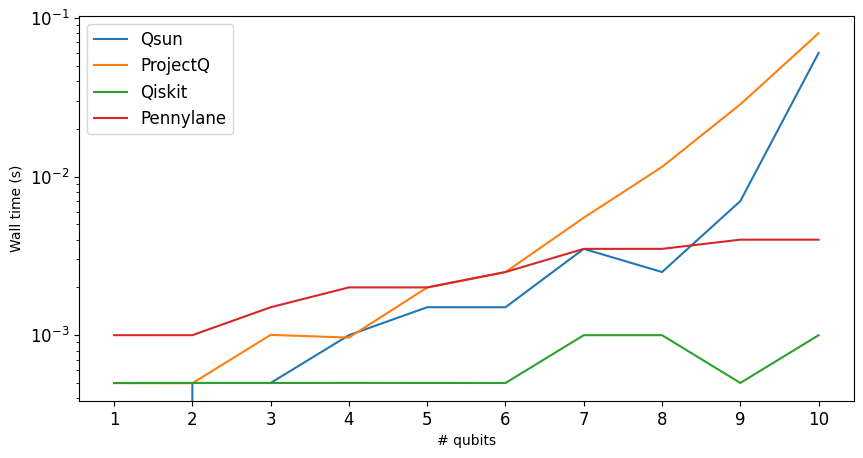

In [16]:
import matplotlib.pyplot as plt
packages = ['Qsun', 'ProjectQ', 'Qiskit', 'Pennylane']
plt.figure(figsize=(10, 5))
for j in range(len(timess)):
    print(len(timess[j]))
    plt.plot(range(1, num_qubits + 1), timess[j], label=packages[j]) 

plt.xticks(range(1, num_qubits + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.xlabel('# qubits')
plt.legend(fontsize=12)
plt.ylabel('Wall time (s)')
plt.show()
# plt.savefig('compare_time_QCD_projectq.png')